# New Zealand Covid-19 Ministry of Health Cases Details Analysis

In [318]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [319]:
# imports
import requests                 # How Python gets the webpages
from bs4 import BeautifulSoup   # Creates structured, searchable object

In [437]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from pylab import rcParams

rcParams['figure.figsize'] = 15, 10
rcParams['font.size'] = 20
rcParams['axes.facecolor'] = 'white'

%matplotlib inline

In [321]:
url = "https://www.health.govt.nz/our-work/diseases-and-conditions/covid-19-novel-coronavirus/covid-19-current-situation/covid-19-current-cases/covid-19-current-cases-details"

In [322]:
response = requests.get(url)
print(response)

<Response [200]>


In [323]:
scraping_table = BeautifulSoup(response.content, 'lxml')
scraping_table = scraping_table.find_all("table")

In [324]:
import pandas as pd

In [325]:
dfs = pd.read_html(str(scraping_table))

In [326]:
confirmed_df = dfs[0]
probable_df = dfs[1]

In [327]:
probable_df.columns = confirmed_df.columns

## Time series

In [332]:
confirmed_df.iloc[:, 0] = pd.to_datetime(confirmed_df.iloc[:, 0], format='%d/%m/%Y')

In [333]:
probable_df.iloc[:, 0] = pd.to_datetime(probable_df.iloc[:, 0], format='%d/%m/%Y')

In [334]:
confirmed_df['Type'] = 'Confirmed'
probable_df['Type'] = 'Probable'

In [335]:
total_df = pd.concat([confirmed_df, probable_df], ignore_index=True)

In [337]:
total_df.sort_values(by='Date of report', ignore_index=True, inplace=True)

In [338]:
total_df.head()

,Date of report,Sex,Age group,DHB,International travel,Last country before return,Flight number,Flight departure date,Arrival date,Type
0,2020-02-26,Female,60 to 69,Auckland,Yes,Indonesia,EK450,25/02/2020,26/02/2020,Confirmed
1,2020-02-28,Male,40 to 49,Southern,NaN,NaN,NaN,NaN,NaN,Confirmed
2,2020-02-28,Female,40 to 49,Southern,NaN,NaN,NaN,NaN,NaN,Confirmed
3,2020-03-02,Female,30 to 39,Waitemata,Yes,Italy,NaN,NaN,26/02/2020,Confirmed
4,2020-03-04,Male,40 to 49,Counties Manukau,Yes,Iran,NaN,NaN,23/02/2020,Confirmed


In [440]:
daily_increase_df = total_df[['Date of report', 'Type']].groupby('Date of report').count().rename(columns={'Type': 'Count'})

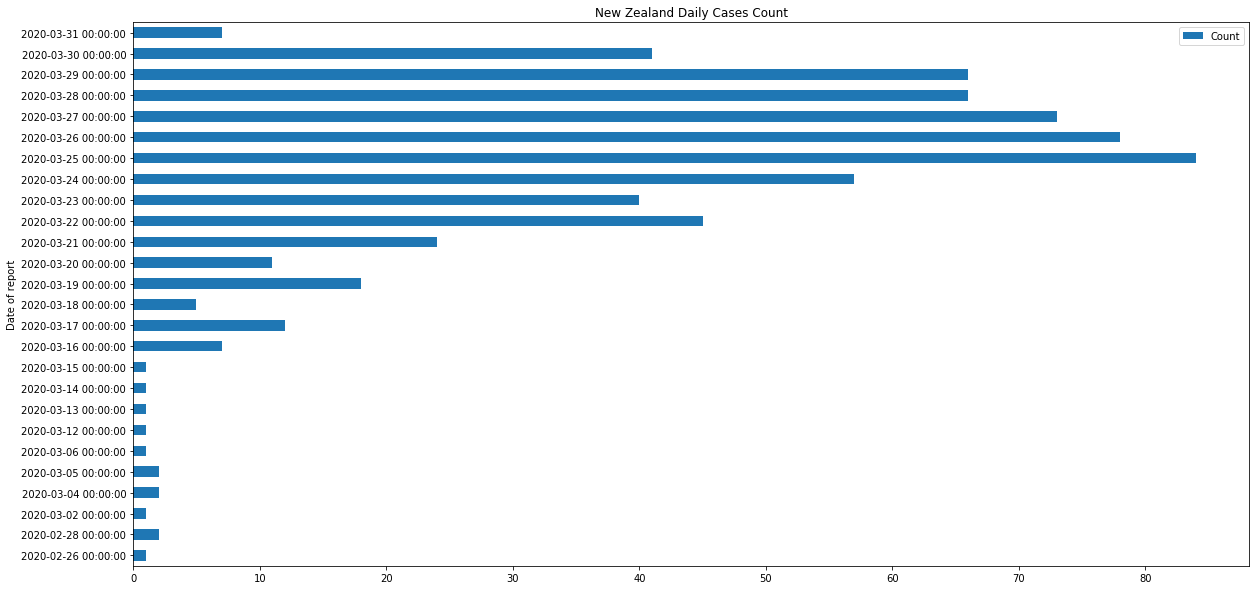

In [441]:
daily_increase_df.plot(kind='barh', figsize=(20,10), title='New Zealand Daily Cases Count')

## What are daily cases consisted of?

In [434]:
inter_trav_entries = total_df['International travel'].fillna('Nan').unique()
print(inter_trav_entries)

['Yes' 'Nan' 'No' 'Unknown']


In [464]:
def overseas_count_fn(x):
    temp_df = total_df[total_df['International travel'].fillna('Nan') == x]
    return temp_df[['Date of report', 'Type']].groupby('Date of report').count().rename(columns={'Type': 'Count'})

In [477]:
fig = go.Figure(go.Bar(x=overseas_count_fn('Yes').index, y=overseas_count_fn('Yes')['Count'], name='International travel' ))
fig.add_trace(go.Bar(x=overseas_count_fn('No').index, y=overseas_count_fn('No')['Count'], name='Domestic' ))
fig.add_trace(go.Bar(x=overseas_count_fn('Unknown').index, y=overseas_count_fn('Unknown')['Count'], name='Unknown' ))
fig.add_trace(go.Bar(x=overseas_count_fn('Nan').index, y=overseas_count_fn('Nan')['Count'], name='Nan' ))
fig.update_layout(barmode='stack', title='New Zealand Covid-19 Daily Increase Consist')
fig.show()

## How many cases in total?

In [339]:
total_cases_num = len(total_df)
print('Total case today is', total_cases_num)

Total case today is 647


## How many people have NaN entry on `Overseas`?

In [343]:
total_df[['Date of report', 'International travel']].fillna('NaN').groupby('International travel').count()

,Date of report
International travel,
NaN,76
No,193
Unknown,33
Yes,345


In [345]:
total_df[total_df['International travel'].isnull()]

,Date of report,Sex,Age group,DHB,International travel,Last country before return,Flight number,Flight departure date,Arrival date,Type
1,2020-02-28,Male,40 to 49,Southern,NaN,NaN,NaN,NaN,NaN,Confirmed
2,2020-02-28,Female,40 to 49,Southern,NaN,NaN,NaN,NaN,NaN,Confirmed
68,2020-03-21,Male,30 to 39,Nelson Marlborough,NaN,NaN,NaN,NaN,NaN,Confirmed
73,2020-03-21,Female,20 to 29,Auckland,NaN,NaN,NaN,NaN,NaN,Confirmed
82,2020-03-21,Male,15 to 19,Counties Manukau,NaN,NaN,NaN,NaN,NaN,Confirmed
...,...,...,...,...,...,...,...,...,...,...
642,2020-03-31,Female,20 to 29,Southern,NaN,NaN,NaN,NaN,NaN,Confirmed
643,2020-03-31,Female,60 to 69,Southern,NaN,NaN,NaN,NaN,NaN,Confirmed
644,2020-03-31,Male,70+,Southern,NaN,NaN,NaN,NaN,NaN,Confirmed
645,2020-03-31,Male,50 to 59,Southern,NaN,NaN,NaN,NaN,NaN,Confirmed


## What's the age distribution?

In [362]:
total_df['Age group'].unique()

array(['60 to 69', '40 to 49', '30 to 39', '70+', '20 to 29', '15 to 19',
       '50 to 59', '10 to 14', '60\xa0to\xa069', '1 to 4', '5 to 9',
       'Unknown', '<1'], dtype=object)

In [363]:
def age_merge(x):
    if(x[0] == '1 to 4' or x[0] == '5 to 9' or x[0] == '<1'):
        x[0] = '0 to 9'
    elif(x[0] == '10 to 14' or x[0] == '15 to 19'):
        x[0] = '10 to 19'
    elif(x[0] == '60\xa0to\xa069'):
        x[0] = '60 to 69'
    return x

In [364]:
covid_age_df = total_df[['Age group', 'Date of report']].apply(age_merge, axis=1).groupby('Age group').count()/total_cases_num

In [365]:
covid_age_df.columns = ['Ratio']

In [366]:
popu_age_df = pd.read_csv('nz_age_ratio.csv')

In [367]:
seventy_plus = popu_age_df.iloc[[-1, -2], 1].sum()

In [368]:
popu_age_df = popu_age_df.drop([7, 8]).append({'Age−group (years)': '70+', 'Age ratio': seventy_plus}, ignore_index = True)

In [369]:
popu_age_df.columns = covid_age_df.reset_index().columns

In [370]:
popu_age_df.set_index('Age group', inplace=True)

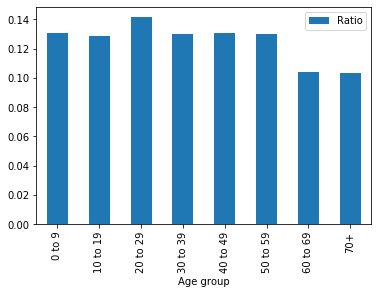

In [371]:
popu_age_df.plot(kind='bar')

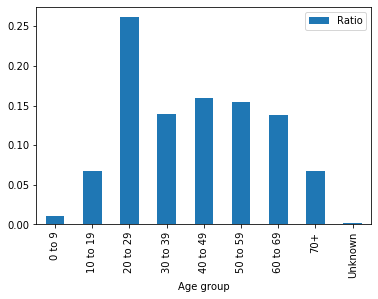

In [372]:
covid_age_df.plot(kind='bar')

In [373]:
covid_age_df['Type'] = 'Covid'
popu_age_df['Type'] = 'Population'

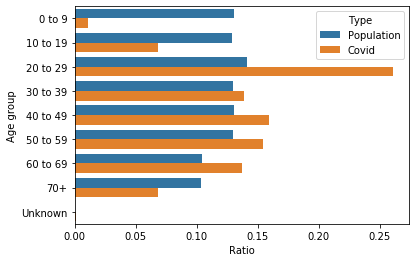

In [374]:
sns.barplot(data=pd.concat([popu_age_df, covid_age_df]).reset_index(), y='Age group' , x='Ratio', hue='Type', orient='h')

## Why 20 to 29 has such a high infected ratio?

In [482]:
def youth_overseas_count_fn(x):
    youth_df = total_df[total_df['Age group'] == '20 to 29']
    temp_df = youth_df[youth_df['International travel'].fillna('Nan') == x]
    return temp_df[['Date of report', 'Type']].groupby('Date of report').count().rename(columns={'Type': 'Count'})

In [488]:
fig = go.Figure(go.Bar(x=youth_overseas_count_fn('Yes').index, y=youth_overseas_count_fn('Yes')['Count'], name='International travel' ))
fig.add_trace(go.Bar(x=youth_overseas_count_fn('No').index, y=youth_overseas_count_fn('No')['Count'], name='Domestic' ))
fig.add_trace(go.Bar(x=youth_overseas_count_fn('Unknown').index, y=youth_overseas_count_fn('Unknown')['Count'], name='Unknown' ))
fig.add_trace(go.Bar(x=youth_overseas_count_fn('Nan').index, y=youth_overseas_count_fn('Nan')['Count'], name='Nan' ))
fig.update_layout(barmode='stack', title='New Zealand Covid-19 Daily Increase Consist(Age group 20 to 29)')
fig.show()

In [487]:
overseas_df.groupby('Age group').count()

,Date of report,Sex,DHB,International travel,Last country before return,Flight number,Flight departure date,Arrival date,Type
Age group,,,,,,,,,
1 to 4,2,2,2,2,2,0,0,1,2
15 to 19,10,10,10,10,9,5,4,9,10
20 to 29,107,107,107,107,98,78,76,101,107
30 to 39,48,48,48,48,45,27,26,47,48
40 to 49,50,49,50,50,46,29,29,45,50
50 to 59,52,51,52,52,48,32,35,49,52
60 to 69,48,48,48,48,48,28,28,47,48
70+,27,27,27,27,26,18,19,25,27
Unknown,1,0,1,1,0,0,0,1,1


## Which countries are imported cases come from?

In [377]:
overseas_df[overseas_df['Last country before return'].isnull()]['Date of report'].count()

23

In [378]:
overseas_df[overseas_df['Last country before return'].notnull()]['Date of report'].count()

322

In [379]:
overseas_df.loc[:, 'Last country before return'] = overseas_df['Last country before return'].fillna('Unkown')

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [380]:
country_count_df = overseas_df[['Last country before return', 'Date of report']].groupby('Last country before return').count().sort_values(by='Date of report', ascending=False)

country_count_df.columns = ['Count']

country_count_df.head(10)

,Count
Last country before return,
United States of America,81
Australia,47
United Kingdom,39
United Arab Emirates,36
Unkown,23
Qatar,18
Singapore,15
New Zealand,8
Indonesia,8


In [381]:
country_count_df.sum()

Count    345
dtype: int64

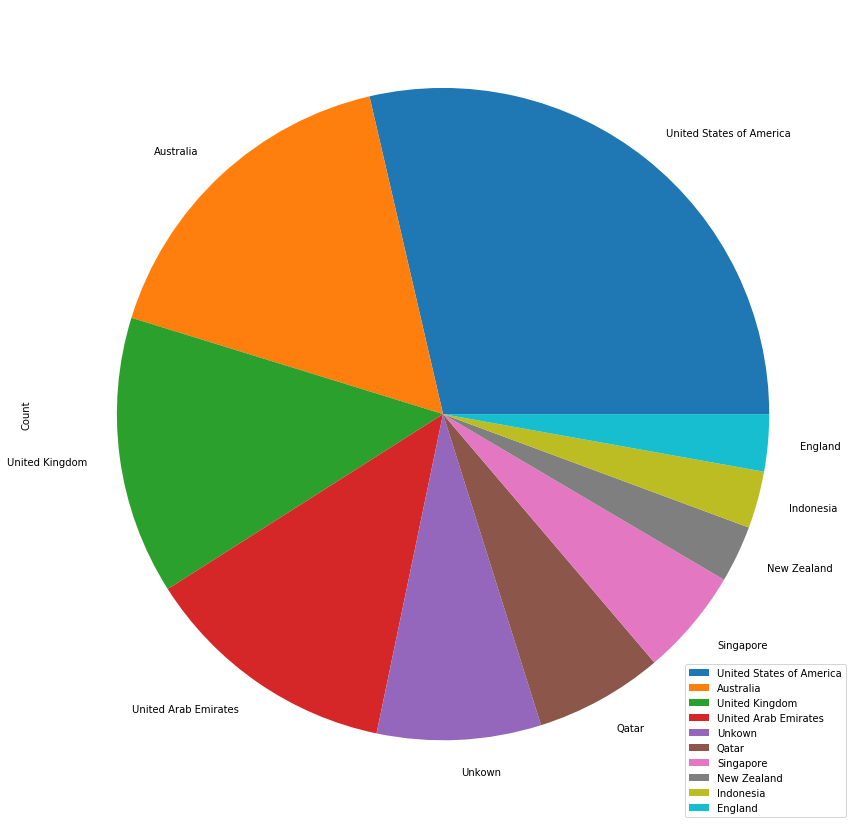

In [382]:
country_count_df.head(10).plot.pie(y='Count', figsize=(15,15))

In [383]:
unknown_overseas_df = overseas_df[overseas_df['Last country before return'] == 'Unkown']

In [385]:
unknown_overseas_df[unknown_overseas_df['Flight number'].notnull()]

,Date of report,Sex,Age group,DHB,International travel,Last country before return,Flight number,Flight departure date,Arrival date,Type
206,2020-03-24,Male,20 to 29,Lakes,Yes,Unkown,QR920,22/03/2020,23/03/2020,Confirmed
238,2020-03-25,NaN,50 to 59,MidCentral,Yes,Unkown,NZ5107,18/03/2020,18/03/2020,Confirmed
294,2020-03-25,Male,40 to 49,Waikato,Yes,Unkown,NZ5,17/03/2020,NaN,Confirmed
376,2020-03-26,Male,20 to 29,Waikato,Yes,Unkown,NZ7,20/03/2020,22/03/2020,Confirmed
424,2020-03-27,Female,20 to 29,South Canterbury,Yes,Unkown,OA4326,19/03/2020,20/03/2020,Confirmed
554,2020-03-29,Female,30 to 39,MidCentral,Yes,Unkown,NZ5107,18/03/2020,18/03/2020,Confirmed
616,2020-03-30,Female,20 to 29,Waitemata,Yes,Unkown,LA801,NaN,20/03/2020,Confirmed


In [386]:
unknown_overseas_df[unknown_overseas_df['Flight number'].isnull()]

,Date of report,Sex,Age group,DHB,International travel,Last country before return,Flight number,Flight departure date,Arrival date,Type
24,2020-03-17,Male,20 to 29,Northland,Yes,Unkown,NaN,NaN,NaN,Confirmed
124,2020-03-22,Male,30 to 39,Waitemata,Yes,Unkown,NaN,NaN,18/03/2020,Confirmed
227,2020-03-24,Female,20 to 29,Southern,Yes,Unkown,NaN,NaN,NaN,Confirmed
244,2020-03-25,Male,50 to 59,Southern,Yes,Unkown,NaN,NaN,NaN,Confirmed
300,2020-03-25,Male,15 to 19,Waikato,Yes,Unkown,NaN,NaN,NaN,Confirmed
364,2020-03-26,Female,20 to 29,Waitemata,Yes,Unkown,NaN,NaN,19/03/2020,Confirmed
367,2020-03-26,Female,40 to 49,Waitemata,Yes,Unkown,NaN,NaN,NaN,Confirmed
384,2020-03-26,Female,40 to 49,Southern,Yes,Unkown,NaN,NaN,NaN,Confirmed
386,2020-03-26,Male,20 to 29,Southern,Yes,Unkown,NaN,NaN,25/03/2020,Confirmed
425,2020-03-27,NaN,Unknown,Taranaki,Yes,Unkown,NaN,NaN,18/03/2020,Confirmed


Current available ventilators number is 533